In [55]:
import numpy as np
import pandas as pd

In [2]:
crop_dataset = pd.read_csv("Crop_recommendation.csv")
soil_dataset = pd.read_csv("Soil.csv")

In [3]:
crop_dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
print(crop_dataset['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [5]:
crop_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
soil_dataset

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.21,0.14,0.62,1.06,278,9.8,165,0.18,8.6,0.57,5.8,88.2,2.4,9.4,4.23,8.81,Fertile
96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58,Non Fertile
97,8.26,0.25,0.71,1.22,277,11.5,264,0.36,7.6,0.07,0.8,90.7,2.5,6.8,3.85,7.26,Fertile
98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10,Non Fertile


In [7]:
x1 = crop_dataset.drop('label',axis=1)
y1 = crop_dataset['label']

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
y1 = le.fit_transform(y1)

In [10]:
y1

array([20, 20, 20, ...,  5,  5,  5])

In [11]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=0)
x1_train, x1_val, y1_train,y1_val = train_test_split(x1_train,y1_train,test_size=0.3,random_state=0)
y1 = dict(zip(list(y1),crop_dataset['label'].to_list()))
y1

{20: 'rice',
 11: 'maize',
 3: 'chickpea',
 9: 'kidneybeans',
 18: 'pigeonpeas',
 13: 'mothbeans',
 14: 'mungbean',
 2: 'blackgram',
 10: 'lentil',
 19: 'pomegranate',
 1: 'banana',
 12: 'mango',
 7: 'grapes',
 21: 'watermelon',
 15: 'muskmelon',
 0: 'apple',
 16: 'orange',
 17: 'papaya',
 4: 'coconut',
 6: 'cotton',
 8: 'jute',
 5: 'coffee'}

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.fit_transform(x1_test)

In [13]:
import keras #importing the keras libraries and packages
from keras.models import Sequential #For initializing ANN Model
from keras.layers import Dense #For different layer structure
from tensorflow.keras.layers import Dropout 

In [14]:
classifier = Sequential() #initialized model
classifier.add(Dense(160,input_dim=7,activation='relu')) #first hidden layer
classifier.add(Dense(70,activation='relu'))
classifier.add(Dense(50,activation='relu'))
classifier.add(Dense(22,activation='softmax'))

In [15]:
classifier.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
classifier.fit(x1_train,y1_train,epochs=10)

Epoch 1/10


34/34 [==============================] - 3s 5ms/step - loss: 2.7714 - accuracy: 0.2458
Epoch 2/10
34/34 [==============================] - 0s 5ms/step - loss: 1.8076 - accuracy: 0.5065
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 0.9249 - accuracy: 0.7876
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.8683
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.9193
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9388
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1992 - accuracy: 0.9499
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1628 - accuracy: 0.9573
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9508
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.9536


In [17]:
classifier.evaluate(x1_test,y1_test)

21/21 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9682


[0.13788695633411407, 0.9681817889213562]

In [18]:
y1_pred = classifier.predict(x1_test)

21/21 [==============================] - 0s 4ms/step


In [19]:
soil_dataset.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


In [20]:
x2 = soil_dataset.drop('Output', axis=1)
y2 = soil_dataset['Output']

In [21]:
y2 = le.fit_transform(y2)

In [22]:
y2

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [64]:
x2_train, x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.3)
x2_train, x2_val, y2_train,y2_val = train_test_split(x2_train,y2_train,test_size=0.3,random_state=0)

In [65]:
x2_train = sc.fit_transform(x2_train)
x2_test = sc.fit_transform(x2_test)

In [66]:
cls = Sequential()
cls.add(Dense(50,input_dim=16,activation='relu'))
cls.add(Dense(24,activation='relu'))
cls.add(Dense(12,activation='relu'))
cls.add(Dense(1,activation='sigmoid'))

In [67]:
cls.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
cls.fit(x2_train,y2_train,batch_size=10,epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.6327
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.7143
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7959
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.8367
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.8571
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8776
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.9184
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.9388
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.9388
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.9388


In [69]:
y2_pred = cls.predict(x2_test)
y2_pred = (y2_pred>0.5)
y2_pred


1/1 [==============================] - 0s 123ms/step


array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [70]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y2_test,y2_pred)
confusion_metric

array([[13,  4],
       [ 0, 13]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y2_test,y2_pred)
accuracy

0.8666666666666667

In [72]:
cls.evaluate(x2_test,y2_test)

1/1 [==============================] - 0s 168ms/step - loss: 0.3779 - accuracy: 0.8667


[0.3779250979423523, 0.8666666746139526]

In [73]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1280      
                                                                 
 dense_1 (Dense)             (None, 70)                11270     
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 22)                1122      
                                                                 
Total params: 17222 (67.27 KB)
Trainable params: 17222 (67.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [74]:
print(cls.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                850       
                                                                 
 dense_15 (Dense)            (None, 24)                1224      
                                                                 
 dense_16 (Dense)            (None, 12)                300       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 2387 (9.32 KB)
Trainable params: 2387 (9.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [34]:
import matplotlib.pyplot as plt

In [35]:
history1 = classifier.fit(x1_train,y1_train,epochs=10,validation_data=(x1_val,y1_val))

Epoch 1/10
34/34 [==============================] - 1s 23ms/step - loss: 0.1125 - accuracy: 0.9666 - val_loss: 396.6147 - val_accuracy: 0.1342
Epoch 2/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0996 - accuracy: 0.9685 - val_loss: 417.0146 - val_accuracy: 0.1494
Epoch 3/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0943 - accuracy: 0.9712 - val_loss: 425.7809 - val_accuracy: 0.1537
Epoch 4/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0860 - accuracy: 0.9768 - val_loss: 451.7522 - val_accuracy: 0.1537
Epoch 5/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 479.3191 - val_accuracy: 0.1126
Epoch 6/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0660 - accuracy: 0.9777 - val_loss: 471.0560 - val_accuracy: 0.1429
Epoch 7/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0704 - accuracy: 0.9768 - val_loss: 492.5124 - val_accuracy: 0.1515
Epoch

In [38]:
hist_soil = cls.fit(x2,y2,epochs=10,validation_data=(x2_val,y2_val))

Epoch 1/10
4/4 [==============================] - 2s 176ms/step - loss: 17.8641 - accuracy: 0.5000 - val_loss: 12.2338 - val_accuracy: 0.5238
Epoch 2/10
4/4 [==============================] - 0s 31ms/step - loss: 11.1873 - accuracy: 0.5100 - val_loss: 5.1284 - val_accuracy: 0.6190
Epoch 3/10
4/4 [==============================] - 0s 35ms/step - loss: 4.4982 - accuracy: 0.5700 - val_loss: 3.7950 - val_accuracy: 0.4762
Epoch 4/10
4/4 [==============================] - 0s 29ms/step - loss: 3.9030 - accuracy: 0.6100 - val_loss: 5.6097 - val_accuracy: 0.5238
Epoch 5/10
4/4 [==============================] - 0s 28ms/step - loss: 4.4059 - accuracy: 0.5900 - val_loss: 3.4622 - val_accuracy: 0.4762
Epoch 6/10
4/4 [==============================] - 0s 27ms/step - loss: 2.5006 - accuracy: 0.6200 - val_loss: 1.7698 - val_accuracy: 0.5714
Epoch 7/10
4/4 [==============================] - 0s 27ms/step - loss: 1.9869 - accuracy: 0.6300 - val_loss: 1.8001 - val_accuracy: 0.7619
Epoch 8/10
4/4 [=======

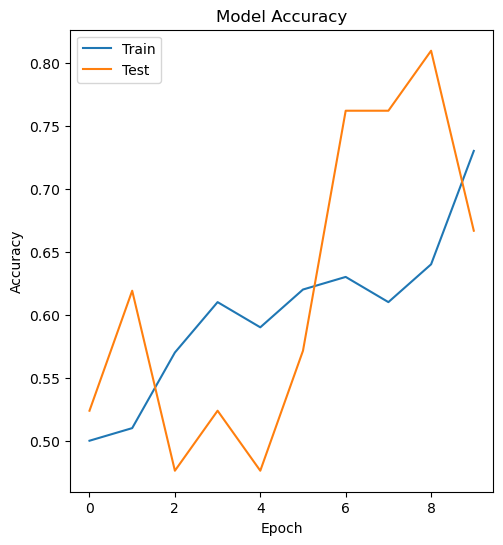

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_soil.history['accuracy'])
plt.plot(hist_soil.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,y2_pred,target_names=['Fertile','Non Fertile']))

              precision    recall  f1-score   support

     Fertile       1.00      0.76      0.87        17
 Non Fertile       0.76      1.00      0.87        13

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30



In [41]:
y1_pred = np.argmax(y1_pred,axis=1)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred, target_names=['apple','banana','blackgram','chickpea','coconut','coffee','cotton','grapes','jute','kidneybeans','lentil','maize','mango','mothbeans','mungbean','muskmelon','orange','papaya','pigeonpeas','pomegranate','rice','watermelon']))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.90      0.95        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.96      1.00      0.98        26
      coffee       0.97      1.00      0.98        29
      cotton       1.00      0.93      0.96        28
      grapes       1.00      1.00      1.00        30
        jute       0.86      0.77      0.81        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.85      1.00      0.92        22
       maize       0.93      1.00      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      0.94      0.97        34
      papaya       1.00    

In [43]:
report1 = classification_report(y1_test, y1_pred, output_dict=True)
accuracy = report1['accuracy']
macro_precision =  report1['macro avg']['precision'] 
macro_recall = report1['macro avg']['recall']    
macro_f1 = report1['macro avg']['f1-score']

In [44]:
print("Accuracy: ",accuracy,"\n","Precision: ",macro_precision,"\n","Recall_score: ",macro_recall,"\n","F1_score: ",macro_f1)

Accuracy:  0.9681818181818181 
 Precision:  0.9683756016978001 
 Recall_score:  0.9704511843980534 
 F1_score:  0.9686222438765022


In [76]:
report2= classification_report(y2_test, y2_pred, output_dict=True)
accuracy = report2['accuracy']
macro_precision =  report2['macro avg']['precision'] 
macro_recall = report2['macro avg']['recall']    
macro_f1 = report2['macro avg']['f1-score']

In [77]:
print("Accuracy: ",accuracy,"\n","Precision: ",macro_precision,"\n","Recall_score: ",macro_recall,"\n","F1_score: ",macro_f1)

Accuracy:  0.8666666666666667 
 Precision:  0.8823529411764706 
 Recall_score:  0.8823529411764706 
 F1_score:  0.8666666666666666
